| [⬅️ Previous Exercise](Exercise2-1_Numpy.ipynb) | [🏠 Index](Index.ipynb) | [➡️ Next Exercise](Exercise2-3_Matplotlib.ipynb) |

# Exercise 2.2: Pandas 🐼

<img src="./assets/panda.jpeg" alt="panda" width="800"/>

[Pandas](https://pandas.pydata.org/docs/index.html) ("Python Data Analysis Library") is arguably the most important tool for data scientists using Python. Built on NumPy, pandas is a widely used Python package that provides tools for data wrangling and analysis. The basis of the pandas library is that it takes data (such as a `.csv` file or `SQL` database) and creates a `DataFrame`: a Python object with rows and columns that looks very similar to tables in other software. With this DataFrame, you can perform a variety of tasks, from viewing and inspecting the data to plotting, analysis, and exporting, and everything in between.  

As the central component of the Python data science toolkit, pandas is essentially where your data will "live" when you're working in Python. Pandas is built on [NumPy](https://numpy.org), which means that many of the data structures of NumPy are used in pandas. Data stored in pandas `DataFrame`s are often analysed statistically in [SciPy](https://docs.scipy.org/doc/scipy/reference/), visualized using plotting functions from [Matplotlib](https://matplotlib.org), and fed into machine learning algorithms in [scikit-learn](https://scikit-learn.org/stable/).

This exercise will cover the basics of pandas, including `DataFrame` construction, importing data with pandas, `DataFrame` attributes, working with `datetime` objects, and data selection and manipulation. While this tutorial is designed to give you an overview of pandas, the [docs](https://pandas.pydata.org/docs/index.html) should the first place you look for more detailed information and additional pandas functionality. The pandas documentation is particularly well-written, making it easy to find methods and functions with numerous examples. Make the docs your best friend! 🐼

The Pandas library was originally developed by Wes McKinney, who is the author of the excellent [Python for Data Analysis](https://learning.oreilly.com/library/view/python-for-data/9781098104023/) book, which is now its third edition.

<p style="height:1pt"> </p>

<div class="boxhead2">
    Exercise 2.1 Topics
</div>

<div class="boxtext2">
<ul class="a">
    <li> 📌 <code>Series</code> and <code>DataFrame</code> objects </li>
    <ul class="b">
        <li> Creating <code>Series</code> and <code>DataFrame</code> objects from scratch </li>
    </ul>
    <li> 📌 Importing data </li>
    <ul class="b">
        <li> <code>pd.read_csv()</code> </li>
        <li> Data cleaning </li>
    </ul>
    <li> 📌 Examining your DataFrame </li>
    <ul class="b">
        <li> Viewing your data </li>
        <li> <code>DataFrame</code> attributes </li>
    </ul>
    <li> 📌 DataFrame indexing + data selection </li>
    <ul class="b">
        <li> Indexing by position with <code>df.iloc</code> </li>
        <li> Row indexing: <code>df.loc</code> </li>
        <li> Column indexing: brackets, dot notation </li>
    </ul>
    <li> 📌 <code>Datetime</code> objects </li>
    <ul class="b">
        <li> Generating <code>datetime</code> objects </li>
        <li> Parsing dates in pandas </li>
    </ul>
    <li> 📌 DataFrame operations </li>
    <ul class="b">
        <li> DataFrame reduction </li>
        <li> Adding data </li>
        <li> Removing data </li>
        <li> Applying functions </li>
        <li> Combining DataFrames </li>
    </ul>
    <li> 📌 Data export </li>
</ul>
</div>

<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

### Instructions
Work through the exercise, writing code where indicated. To run a cell, click on the cell and press "Shift" + "Enter" or click the "Run" button in the toolbar at the top. Note: Do not restart the kernel and clear all outputs. If this happens, run the last cell in the notebook before proceeding.

<p style="color:#408000; font-weight: bold"> 🐍 &nbsp; &nbsp; This symbol designates an important note about Python structure, syntax, or another quirk.  </p>

<p style="color:#008C96; font-weight: bold"> ▶️ &nbsp; &nbsp; This symbol designates a cell with code to be run.  </p>

<p style="color:#008C96; font-weight: bold"> ✏️ &nbsp; &nbsp; This symbol designates a partially coded cell with an example.  </p>

<p style="color:#008C96; font-weight: bold"> 📚 &nbsp; &nbsp; This symbol designates a practice question.  </p>


<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

## Introduction to pandas

<img src="./assets/pandas.svg" alt="pandas" width="400"/>

As always, we must begin by importing the pandas library. The standard import statement for pandas is:

```python
import pandas as pd
```

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [2]:
import pandas as pd

import numpy as np

#lower case series is a variable that is calling on the object?
series = pd.Series([25.8, 16.2, 17.9, 18.8, 23.6, 29.9, 23.6, 22.1]) ## pd.Series is an object. 
#The capitalized Series specifies this.

### `Series` and `DataFrame` objects
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

The core components of pandas are the `Series` and the `DataFrame` objects. Both of these are essentially enhanced versions of the NumPy array, with a few key differences: 1) pandas DataFrames can be *heterogeneous*, meaning that the columns can contain different data types; and 2) the rows and columns of DataFrames can be identified with labels (usually strings) in addition to standard integer indexing. 

A `Series` is essentially a column of data, while a `DataFrame` is a multidimensional table made up of many `Series`, not unlike a spreadsheet:

<img src="./assets/series+dfs.png" alt="dfs" width="400"/>

Series and DataFrames are similar in many respects – most common operations can be performed on both objects, though Series are more limited, as they can only ever contain a single column (i.e. you cannot turn a `Series` into a `DataFrame` by adding a column).

Both `Series` and `DataFrame` objects contain an `Index` object similar to the row index of the `ndarray` or the index of a list. The pandas `Index` object can be conceptualized as an immutable array or an ordered multiset. Unless explicitly defined otherwise, the `Index` of a `Series` or `DataFrame` is initialized as the ordered set of positive integers beginning at 0 (see figure above).

#### Creating `Series` and `DataFrame` objects from scratch

A `Series` can be easily created from a list or array as follows:

```python
# Create a Series from a list
series = pd.Series([25.8, 16.2, 17.9, 18.8, 23.6, 29.9, 23.6, 22.1])

series
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>0    25.8
1    16.2
2    17.9
3    18.8
4    23.6
5    29.9
6    23.6
7    22.1
dtype: float64
</samp></pre>

There are many ways to create a `DataFrame`, but the most common are to use a list of lists or a dictionary. First, let's use a list of lists (or an array):

```python
# Create a df from a list of lists
df = pd.DataFrame([[25.8, 28.1, 16.2, 11.0],[17.9, 14.2, 18.8, 28.0],
                   [23.6, 18.4, 29.9, 27.8],[23.6, 36.2, 22.1, 14.5]],
                 columns=['A','B','C','D'])

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>      A     B     C     D
0  25.8  28.1  16.2  11.0
1  17.9  14.2  18.8  28.0
2  23.6  18.4  29.9  27.8
3  23.6  36.2  22.1  14.5
</samp></pre>


Much like with NumPy arrays, each inner list element in the outer list corresponds to a *row*. Using the optional `columns` keyword argument, we can specify the name of each column. If this parameter is not passed, the columns would be displayed with integer index values (like the rows).

Next, let's create a DataFrame from a `dict` object:

```python
# Create a df from a dictionary
df = pd.DataFrame({'A': [25.8, 17.9, 23.6, 23.6],
                   'B': [28.1, 14.2, 18.4, 36.2],
                   'C': [16.2, 18.8, 29.9, 22.1],
                   'D': [11.0, 28.0, 27.8, 14.5]})

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>      A     B     C     D
0  25.8  28.1  16.2  11.0
1  17.9  14.2  18.8  28.0
2  23.6  18.4  29.9  27.8
3  23.6  36.2  22.1  14.5
</samp></pre>

Using this method, each `key` corresponds to a column name, and each `value` is a column.

<div class="practice">
    📚  <b> Practice 1. </b> 
<ol class="alpha">
    <li> Use a list of lists to construct a DataFrame named <code>df1</code> containing the data in the table below.</li>
    <table style="">
      <tr style="border-bottom: 1px solid black">
        <th style="text-align:left;"> River </th>
        <th style="text-align:left;"> Length $(\text{km})$ </th>
        <th style="text-align:left;"> Drainage area $(\text{km}^2)$ </th>
      </tr>
      <tr style="background-color: #c9e6e8;">
        <td style="text-align:left;"> Amazon </td> <td> 6400 </td> <td> 7,050,000 </td>
      </tr>
      <tr>
        <td style="text-align:left;"> Congo </td> <td> 4371 </td> <td>  4,014,500 </td>
      </tr>
      <tr style="background-color: #c9e6e8;">
        <td style="text-align:left"> Yangtze </td> <td> 6418 </td> <td>  1,808,500 </td>
      </tr>
      <tr>
        <td style="text-align:left">  Mississippi </td> <td> 3730 </td> <td>  3,202,230 </td>
      </tr>
    </table> <br>
    <li> Use a <code>dict</code> to construct a DataFrame named <code>df2</code> containing the data in the table below.</li>
    <table style="">
      <tr style="border-bottom: 1px solid black">
        <th style="text-align:left;"> River </th>
        <th style="text-align:left;"> Length $(\text{km})$ </th>
        <th style="text-align:left;"> Drainage area $(\text{km}^2)$ </th>
      </tr>
      <tr style="background-color: #c9e6e8;">
        <td style="text-align:left;"> Zambezi </td> <td> 2574 </td> <td> 1,331,000 </td>
      </tr>
      <tr>
        <td style="text-align:left;"> Mekong </td> <td> 4023 </td> <td>  811,000 </td>
      </tr>
      <tr style="background-color: #c9e6e8;">
        <td style="text-align:left"> Murray </td> <td> 2508 </td> <td>  1,061,469 </td>
      </tr>
      <tr>
        <td style="text-align:left">  Rhône </td> <td> 813 </td> <td>  98,000 </td>
      </tr>
      <tr style="background-color: #c9e6e8;">
        <td style="text-align:left"> Cubango </td> <td> 1056 </td> <td>  530,000 </td>
      </tr>
    </table> <br>
</ol>
    
</div>

In [36]:
df1 = pd.DataFrame([
    [6400, 7050000],
    [4371, 4014500],
    [6478, 1808500],
    [3730, 3202230]
],
    columns = ["length(km)", "Drainage area ($km^2$)"],
    index = ["Amazon", "Congo", "Yangtze", "Mississippi"])

print(df1)



df2 = pd.DataFrame({
    "River": ["Zambezi", "Mekong", "Murray", "Rhone", "Cubango"],
    "Length (km)": [2574, 4023, 2508, 813, 1056],
    "Drainage area (km^2)": [1331000, 811000, 1061469, 98000, 530000]
})

df2


### other way of doing it

df_river = pd.DataFrame({
    "length(km)": [2574, 4023, 2508, 813, 1056],
    "Drainage area ($km^2$)": [1331000, 811000, 1061469, 98000, 530000]
},
    index = ["Zambezi", "Mekong", "Murray", "Rhone", "Cubango"])

df_river

#usually doesn't matter if rivers is the first column or used as the index. 
#if using it as an index, name the dataframe with what the column name would have been. 
#you want to use the index rather than first column if data is based on date/time ~ gives you more options. 

             length(km)  Drainage area ($km^2$)
Amazon             6400                 7050000
Congo              4371                 4014500
Yangtze            6478                 1808500
Mississippi        3730                 3202230


,length(km),Drainage area ($km^2$)
Zambezi,2574,1331000
Mekong,4023,811000
Murray,2508,1061469
Rhone,813,98000
Cubango,1056,530000


In [18]:
# Create a df from a list of lists
df = pd.DataFrame([[25.8, 28.1, 16.2, 11.0],[17.9, np.nan, 14.2, 28.0],
                   [23.6, 18.4, 29.9, 27.8],[23.6, 36.2, 22.1, 14.5]],
                 columns=['A','B','C','D'])

df

# Create a df from a dictionary
df = pd.DataFrame({'A': [25.8, 17.9, 23.6, 23.6],
                   'B': [28.1, 14.2, 18.4, 36.2],
                   'C': [16.2, 18.8, 29.9, 22.1],
                   'D': [11.0, 28.0, np.nan, 27.8]})

df

df = pd.DataFrame({'Animal': ["Dog", "Cat", "Capybara"],
                   'Weight': [20, 12, 70],
                   'Diet': ["steak", "tuna", "fruit"]},
                 index = ["Row 1", "Row 2", "Row 3"])

df

,Animal,Weight,Diet
Row 1,Dog,20,steak
Row 2,Cat,12,tuna
Row 3,Capybara,70,fruit


### Importing data
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

While you will likely create many DataFrames from scratch throughout your code, in most cases, you'll have some data you'd like to import as a starting point. Pandas has [several functions](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) to read in data from a variety of formats. For now, we'll focus on reading in data from plain-text flat files.

Most environmental datasets are stored as **flat files**, meaning that the data are unstructured – the records follow a uniform format, but they are not indexed and no information about relationships between records is included. Plain-text flat files use **delimiters** such as commas, tabs, or spaces to separate values. Pandas has a few different functions to import flat files, but perhaps the most useful is the `pd.read_csv()` function, designed to read CSV files. As its name suggests, a CSV (Comma Separated Values) file is a plain-text file that uses commas to delimit (separate) values. Each line of the file is a record (row).  

Let's start by taking a look at the [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [33]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_li

As you can see, `pd.read_csv()` has *quite a few* parameters. Don't be overwhelmed – most of these are optional arguments that allow you to specify exactly how your data file is structured and which part(s) you want to import. In particular, the `sep` parameter allows the user to specify the type of delimiter used in the file. The default is a comma, but you can actually pass other common delimiters (such as `sep='\t'`, which is a tab) to import other delimited files. The only *required* argument is a string specifying the filepath of your file. 

In this exercise, we'll be importing a CSV file containing radiation data for October 2019 from a Baseline Surface Radiation Network (BSRN) station in Southern Africa. [BSRN](https://bsrn.awi.de) is a Global Energy and Water Cycle Experiment project aimed at monitoring changes in the Earth's surface radiation field. The network is comprised of 64 stations across various climate zones across the globe, whose data are used as the global baseline for surface radiation by the Global Climate Observing System.

The CSV file is located in the [data](../data) folder on the course GitHub repository. The files should already by in your private repo. If you don't see the file, you can copy it over from our course master directory by typing the following command:

<p style="margin-left:60pt">
    <code>cp -R EDS217/data eds-217/data</code>
</p>

While the file may not display properly on the server, the first 10 lines of the file should look like:

```
DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
2019-10-01 00:00:00,2,-3,0,0,0,-3,0,300,0.1,0,383,16.2,30.7,966
2019-10-01 00:01:00,2,-3,0,0,0,-3,0,300,0.3,0,383,16.4,30.7,966
2019-10-01 00:02:00,2,-3,0,0,0,-3,0,300,0.2,0,383,16.5,30.5,966
2019-10-01 00:03:00,2,-3,0,0,0,-3,0,300,0.1,0,383,16.5,30.4,966
2019-10-01 00:04:00,2,-3,0,0,0,-3,0,300,0.1,0,383,16.8,30.5,966
2019-10-01 00:05:00,2,-2,0,0,0,-2,0,300,0.2,0,383,16.9,30.5,966
2019-10-01 00:06:00,2,-2,0,0,0,-2,0,300,0.2,0,383,16.8,30.4,966
2019-10-01 00:07:00,2,-2,0,0,0,-2,0,300,0.1,0,384,17,31,966
2019-10-01 00:08:00,2,-2,0,0,0,-2,0,300,0.2,0,384,16.7,30.6,966
```

The first line of the file contains the names of the columns, which are described in the table below.

| Column name | Description |
| :---------- | :---------- |
| **DATE**    | Date/Time |
| **H_m**     | Height of measurement $(\text{m})$ |
| **SWD_Wm2** | Incoming shortwave radiation $(\text{W m}^{-2})$|
| **STD_SWD** | Standard deviation of incoming shortwave radiation $(\text{W m}^{-2})$ |
| **DIR_Wm2** | Direct radiation $(\text{W m}^{-2})$ |
| **STD_DIR** | Standard deviation of direct radiation $(\text{W m}^{-2})$ |
| **DIF_Wm2** | Diffuse radiation $(\text{W m}^{-2})$ |
| **STD_DIF** | Standard deviation of diffuse radiation $(\text{W m}^{-2})$ |
| **LWD_Wm2** | Incoming longwave radiation $(\text{W m}^{-2})$ |
| **STD_LWD** | Standard deviation of incoming longwave radiation $(\text{W m}^{-2})$ |
| **SWU_Wm2** | Outgoing shortwave radiation $(\text{W m}^{-2})$ |
| **LWU_Wm2** | Outgoing longwave radiation $(\text{W m}^{-2})$ |
| **T_degC**  | Air temperature $(^{\circ}\text{C})$ |
| **RH**      | Relative humidity $(\%)$ |
| **P_hPa**   | Air pressure $(\text{hPa})$ |


We can import the data into pandas using the following syntax:

```python
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv')
```

<div class="example">
    ✏️ <b> Try it. </b> 
    Copy and paste the code above to import the data in the CSV file into a pandas <code>DataFrame</code> named <code>bsrn</code>.
</div>

In [3]:
bsrn = pd.read_csv("../data/BSRN_GOB_2019-10.csv")

#### A bit of housekeeping

<img src="./assets/mariekondo.png" alt="mariekondo" width="400"/>

Before we move on into viewing and operating on the DataFrame, it's worth noting that data import is rarely ever this straightforward. Most raw data require considerable cleaning before they are ready for analysis. Often some of this must happen outside of Python to format the data for import, but ideally the majority of data preprocessing can be conducted in Python – allowing you to perform the same operations on multiple datasets at once and making the process easily repeatable.

<img src="./assets/datacleaning.jpg" alt="datacleaning" width="800"/>


### Examining your DataFrame
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Now that we've loaded in our data, it would be useful to take a look at it. Given the size of our `bsrn` DataFrame, however, we can't simply print out the entire table. The `df.head()` method allows us to quickly view the first five rows.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [37]:
bsrn.head()

bsrn.columns

Index(['DATE', 'H_m', 'SWD_Wm2', 'STD_SWD', 'DIR_Wm2', 'STD_DIR', 'DIF_Wm2',
       'STD_DIF', 'LWD_Wm2', 'STD_LWD', 'SWU_Wm2', 'LWU_Wm2', 'T_degC', 'RH',
       'P_hPa'],
      dtype='object')

Similarly, `df.tail()` prints the last five rows.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [38]:
bsrn.tail()

,DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
44635,2019-10-31 23:55:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.6,964
44636,2019-10-31 23:56:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.1,35.5,964
44637,2019-10-31 23:57:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.3,964
44638,2019-10-31 23:58:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,381.0,0.2,0,423,23.0,35.2,964
44639,2019-10-31 23:59:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,381.0,0.1,0,423,23.1,35.0,964


Both `df.head()` and `df.tail()` can also accept an integer argument, e.g. `df.head(n)`, where the first `n` rows will be printed.

<div class="example">
    ✏️ <b> Try it. </b> 
    Print the first and last 10 rows of <code>bsrn</code> using <code>df.head()</code> and <code>df.tail()</code>.
</div>

In [40]:
bsrn.head(10)

bsrn.tail(10)

,DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
44630,2019-10-31 23:50:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,381.0,0.2,0,422,22.6,35.8,964
44631,2019-10-31 23:51:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.0,0,422,22.5,35.8,964
44632,2019-10-31 23:52:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,422,22.6,35.8,964
44633,2019-10-31 23:53:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,422,22.8,35.8,964
44634,2019-10-31 23:54:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,422,22.9,35.7,964
44635,2019-10-31 23:55:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.6,964
44636,2019-10-31 23:56:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.1,35.5,964
44637,2019-10-31 23:57:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.3,964
44638,2019-10-31 23:58:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,381.0,0.2,0,423,23.0,35.2,964
44639,2019-10-31 23:59:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,381.0,0.1,0,423,23.1,35.0,964


In addition to those for viewing your data, pandas has several methods to describe attributes of your `DataFrame`. For example, `df.info()` provides basic information about the DataFrame:

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [41]:
bsrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     44640 non-null  object 
 1   H_m      44640 non-null  int64  
 2   SWD_Wm2  44630 non-null  float64
 3   STD_SWD  44637 non-null  float64
 4   DIR_Wm2  44623 non-null  float64
 5   STD_DIR  44623 non-null  float64
 6   DIF_Wm2  44632 non-null  float64
 7   STD_DIF  44632 non-null  float64
 8   LWD_Wm2  44589 non-null  float64
 9   STD_LWD  44637 non-null  float64
 10  SWU_Wm2  44640 non-null  int64  
 11  LWU_Wm2  44640 non-null  int64  
 12  T_degC   44640 non-null  float64
 13  RH       44640 non-null  float64
 14  P_hPa    44640 non-null  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 5.1+ MB


The `df.info()` method provides several different pieces of information about the DataFrame that are sometimes useful to retrieve separately. For example, `df.index` returns the index as an iterable object for use in plotting and the `df.columns` method returns the column names as an index object which can be used in a `for` loop or to reset the column names. These and other descriptive DataFrame methods are summarized in the table below.


| Method | Description |
| :----- | :---------- |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.info() </span> | Prints a concise summary of the DataFrame |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.head(<i>n</i>) </span> | Returns the first *n* rows of the DataFrame |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.tail(<i>n</i>) </span> | Returns the last *n* rows of the DataFrame |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.index </span> | Returns the index range (number of rows) |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.columns </span> | Returns the column names |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.dtypes </span> | Returns a Series with the data types of each column indexed by column name |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.size </span> | Returns the total number of values in the DataFrame as an `int` |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.shape </span> | Returns the shape of the DataFrame as a tuple (*rows*,*columns*) |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.values </span> | Returns the DataFrame values as a NumPy array (not recommended) |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.describe() </span> | Returns a DataFrame with summary statistics of each column |

<div class="practice">
    📚  Practice 2. Using the DataFrame <code>bsrn</code>:
    <ol class="alpha">
        <li> Print a list of column names. </li>
        <li> How many values are there in the entire DataFrame? </li>
        <li> What is the data type of the first column? </li>
</ol>
</div>


In [54]:
bsrn.columns
bsrn.size
bsrn.dtypes # object

bsrn.describe() # provides count, mean, std, min/max and quartile info for each column. 



,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
count,44640.0,44630.000000,44637.000000,44623.000000,44623.000000,44632.000000,44632.000000,44589.000000,44637.000000,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000
mean,2.0,318.046516,3.269498,348.581987,3.916621,65.294542,0.349209,342.350692,0.224545,110.445004,455.054032,22.525101,39.586891,965.043302
std,0.0,401.239735,19.032068,412.247947,21.608338,92.513191,1.290990,36.968507,0.354692,134.875619,79.024957,7.340310,24.702667,1.637144
min,2.0,-8.000000,0.000000,-1.000000,0.000000,-9.000000,0.000000,266.000000,0.000000,-2.000000,338.000000,9.200000,5.200000,960.000000
25%,2.0,-2.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,313.000000,0.100000,0.000000,388.000000,16.200000,18.000000,964.000000
50%,2.0,27.000000,0.300000,0.000000,0.000000,19.000000,0.100000,340.000000,0.100000,11.000000,432.000000,22.400000,33.100000,965.000000
75%,2.0,694.000000,1.000000,813.000000,0.900000,113.000000,0.200000,368.000000,0.300000,245.000000,522.000000,28.400000,58.900000,966.000000
max,2.0,1383.000000,337.800000,1066.000000,383.100000,659.000000,51.500000,456.000000,18.600000,454.000000,657.000000,43.500000,94.800000,969.000000


### DataFrame indexing + data selection
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Because DataFrames can contain *labels* as well as *indices*, indexing in pandas DataFrames is a bit more complicated than we've seen with strings, lists, and arrays. Generally speaking, pandas allows indexing by either the integer index or the label, but the syntax is a bit different for each. 

The index operator, which refers to the square brackets following an object `[]`, does not work quite like we might expect it to.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [89]:
bsrn[['RH']]

bsrn.iloc[1434, 12]

bsrn.iloc[1434,:]['T_degC']

bsrn.iloc[1434,-3:] #row 1434 but just the last 3 columns


bsrn.iloc[::40,:5] ##shows first 5 columns skipping so every 40th row is shown


bsrn.loc[1434] # = bsrn.iloc[1434,:]   just indexes on the row


bsrn[['SWD_Wm2','LWD_Wm2']] ##returns multiple columns (list of columns)


##
bsrn[
    [column for column in bsrn.columns if column.endswith('Wm2')]
]

bsrn[[column for column in bsrn.columns]]



#bsrn[1434,12] this does NOT work 

,DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
0,2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966
1,2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966
2,2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966
3,2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966
4,2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,2019-10-31 23:55:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.6,964
44636,2019-10-31 23:56:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.1,35.5,964
44637,2019-10-31 23:57:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.3,964
44638,2019-10-31 23:58:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,381.0,0.2,0,423,23.0,35.2,964


Instead of a value, we get a `KeyError`. This is because the `Index` object in pandas is essentially a dictionary, and we have not passed proper `keys`. 

Instead, pandas uses `df.iloc[]` for integer-based indexing to select data by position:

```python
bsrn.iloc[1434,12]
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 12pt"> <span style="color: #A514F6; font-weight: bold"> >>> </span> 19.6 </p> 


`df.iloc` acts just like the index operator works with arrays. In addition to indexing a single value, `df.iloc` can be used to select multiple rows and columns via slicing: `df.iloc[row_start:row_end:row_step, col_start:col_end:col_step]`.

```python
# Select 6 rows, last 3 columns
bsrn.iloc[1434:1440,12:]
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>      T_degC    RH  P_hPa
1434    19.6  17.6    965
1435    19.5  17.5    965
1436    19.4  17.4    965
1437    19.1  17.5    965
1438    19.4  17.6    965
1439    19.3  17.5    965
</samp></pre>

```python
# First 5 columns, every 40th row
bsrn.iloc[::40,:5]
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>                      DATE  H_m  SWD_Wm2  STD_SWD  DIR_Wm2
0      2019-10-01 00:00:00    2     -3.0      0.0      0.0
40     2019-10-01 00:40:00    2     -3.0      0.0      0.0
80     2019-10-01 01:20:00    2     -3.0      0.0      0.0
120    2019-10-01 02:00:00    2     -3.0      0.0      0.0
160    2019-10-01 02:40:00    2     -2.0      0.0      0.0
...                    ...  ...      ...      ...      ...
44440  2019-10-31 20:40:00    2     -2.0      0.0      0.0
44480  2019-10-31 21:20:00    2     -2.0      0.0      0.0
44520  2019-10-31 22:00:00    2     -2.0      0.0      0.0
44560  2019-10-31 22:40:00    2     -2.0      0.0      0.0
44600  2019-10-31 23:20:00    2     -2.0      0.0      0.0

[1116 rows x 5 columns]
</samp></pre>

#### Row indexing

In addition to `df.iloc`, rows of a DataFrame can be accessed using `df.loc`, which "locates" rows based on their labels. Unless you have set a custom index (which we will see later), the row "labels" are the same as the integer index.

When indexing a single row, `df.loc` (like `df.iloc`) transforms the row into a `Series`, with the column names as the index:

```python
# Classic indexing
bsrn[1434]
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>DATE       2019-10-01 23:54:00
H_m                          2
SWD_Wm2                     -2
STD_SWD                      0
DIR_Wm2                      0
STD_DIR                      0
DIF_Wm2                     -2
STD_DIF                      0
LWD_Wm2                    307
STD_LWD                    0.1
SWU_Wm2                      0
LWU_Wm2                    385
T_degC                    19.6
RH                        17.6
P_hPa                      965
Name: 1434, dtype: object
</samp></pre>

<div class="python">
    🐍 <b>DataFrames + data types.</b>  Notice that the <code>dtype</code> of the Series is an <code>object</code>. This is because the column contains mixed data types – floats, integers, and an <code>object</code> in the first row. Unlike NumPy, pandas allows both rows and columns to contain mixed data types. However, while it is perfectly fine (and, in fact, almost always necessary) to have multiple data types within a single <b><i>row</i></b>, it is best if each <b><i>column</i></b> is comprised of a <b><i>single data type</i></b>.
</div>

Slicing using `df.loc` is similar to `df.iloc`, with the exception that the `stop` value is ***inclusive***:

```python
# Using .loc
bsrn.loc[1434:1440]
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>                     DATE  H_m  SWD_Wm2  STD_SWD  DIR_Wm2  ...  SWU_Wm2  LWU_Wm2  T_degC    RH  P_hPa
1434  2019-10-01 23:54:00    2     -2.0      0.0      0.0  ...        0      385    19.6  17.6    965
1435  2019-10-01 23:55:00    2     -2.0      0.0      0.0  ...        0      385    19.5  17.5    965
1436  2019-10-01 23:56:00    2     -2.0      0.0      0.0  ...        0      386    19.4  17.4    965
1437  2019-10-01 23:57:00    2     -2.0      0.0      0.0  ...        0      386    19.1  17.5    965
1438  2019-10-01 23:58:00    2     -2.0      0.0      0.0  ...        0      386    19.4  17.6    965
1439  2019-10-01 23:59:00    2     -2.0      0.0      0.0  ...        0      386    19.3  17.5    965
1440  2019-10-02 00:00:00    2     -2.0      0.0      0.0  ...        0      386    19.1  17.5    965

[7 rows x 15 columns]
</samp></pre>

#### Column indexing

In addition to integer indexing with `df.iloc`, columns can be accessed in two ways: dot notation `.` or square brackets `[]`. The former takes advantage of the fact that the columns are effectively "attributes" of the DataFrame and returns a Series:

```python
bsrn.SWD_Wm2
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>0       -3.0
1       -3.0
2       -3.0
3       -3.0
4       -3.0
         ...
44635   -2.0
44636   -2.0
44637   -2.0
44638   -2.0
44639   -2.0
Name: SWD_Wm2, Length: 44640, dtype: float64
</samp></pre>

The second way of extracting columns is to pass the column name as a string in square brackets, i.e. `df['col']`:

```python
bsrn['SWD_Wm2']
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>0       -3.0
1       -3.0
2       -3.0
3       -3.0
4       -3.0
         ...
44635   -2.0
44636   -2.0
44637   -2.0
44638   -2.0
44639   -2.0
Name: SWD_Wm2, Length: 44640, dtype: float64
</samp></pre>

Using single brackets, the result is a Series. However, using double brackets, it is possible to return the column as a DataFrame:

```python
bsrn[['SWD_Wm2']]
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>       SWD_Wm2
0         -3.0
1         -3.0
2         -3.0
3         -3.0
4         -3.0
...        ...
44635     -2.0
44636     -2.0
44637     -2.0
44638     -2.0
44639     -2.0

[44640 rows x 1 columns]
</samp></pre>

This allows you to add additional columns, which you cannot do with a `Series` object. Furthermore, with the double bracket notation, a list is being passed to the index operator (outer brackets). Thus, it is possible to extract multiple columns by adding column names to the list:

```python
bsrn[['SWD_Wm2','LWD_Wm2']]
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>       SWD_Wm2  LWD_Wm2
0         -3.0    300.0
1         -3.0    300.0
2         -3.0    300.0
3         -3.0    300.0
4         -3.0    300.0
...        ...      ...
44635     -2.0    380.0
44636     -2.0    380.0
44637     -2.0    380.0
44638     -2.0    381.0
44639     -2.0    381.0

[44640 rows x 2 columns]
</samp></pre>

When accessing a single column, the choice between using dot notation and square brackets is more or less a matter of preference. However, there are occasions when the bracket notation proves particularly useful. For example, you could access each column in a DataFrame by iterating through `df.columns`, which returns an `Index` object containing the column names as `str` objects that can be directly passed to the index operator. Additionally, you may find it useful to use the double bracket syntax to return a `DataFrame` object, rather than a `Series`, which can only ever contain a single column of data.


<div class="practice">
    📚  Practice 3.
    <ol class="alpha">
        <li> Create a new DataFrame containing the first record for each day and the following columns: the timestamp of the record, incoming shortwave radiation, direct and diffuse radiation, and incoming longwave radiation. (Hint: the BSRN station collects data every minute). </li>
        <li> Create a new Series containing the temperature values every hour at the top of the hour. </li>
    </ol>
</div>

In [105]:
#location indexing to get the first record for each day
first_day_bsrn = bsrn.iloc[::1440,:]

#pull out columns of interest from there
first_day_bsrn[['DATE','SWD_Wm2', 'DIR_Wm2', 'DIF_Wm2', 'LWD_Wm2']]


#one row methods 
df = bsrn.loc[::1440, ['DATE', "SWD_Wm2", "RH"]]
df = bsrn.loc[::1440][['DATE','SWD_Wm2', 'DIR_Wm2', 'DIF_Wm2', 'LWD_Wm2']]


#df2 = bsrn.loc[[x for x in range(0,bsrn.index[-1],24*60)],[“DATE”, “STD_SWD”, “DIR_Wm2”, “SWU_Wm2",“LWU_Wm2”]]



# PRACTICE B
hourly_temps = bsrn.iloc[::60,:]

hourly_temps[['T_degC']]



,T_degC
0,16.2
60,18.2
120,18.0
180,17.9
240,18.1
...,...
44340,27.1
44400,23.6
44460,22.7
44520,22.0


### `Datetime` objects
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Like the BSRN data we are working with in this exercise, many environmental datasets include timed records. Python has a few different libraries for dealing with timestamps, which are referred to as **datetime** objects. The standard [**`datetime`**](https://docs.python.org/3/library/datetime.html) library is the primary way of manipulating dates and times in Python, but there are additional third-party packages that provide additional support. A few worth exploring are [**`dateutil`**](https://dateutil.readthedocs.io/en/stable/), an extension of the datetime library useful for parsing timestamps, and [**`pytz`**](http://pytz.sourceforge.net), which provides a smooth way of tackling time zones.

Though we will not review `datetime` objects in depth here, it is useful to understand the basics of how to deal with `datetime` objects in Python as you will no doubt encounter them in the future. For now, we will focus on a few pandas functions built on the datetime library to handle `datetime` objects.

The `pd.date_range()` function allows you to build a DatetimeIndex with a fixed frequency. This can be done by specifying a start date and an end date as follows:

```python
pd.date_range('4/1/2017','4/30/2017')

>>> DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
                   '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
                   '2017-01-09', '2017-01-10',
                   ...
                   '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
                   '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
                   '2020-12-30', '2020-12-31'],
                  dtype='datetime64[ns]', length=1461, freq='D')
```

In [4]:
pd.date_range('4/1/2017','4/30/2017', freq = "D")

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
               '2017-04-29', '2017-04-30'],
              dtype='datetime64[ns]', freq='D')

Because it was not specified otherwise, the frequency was set as the default, daily. To return a different frequency, we could use the `freq` parameter:

```python
# Specify start and end, minute-ly frequency
pd.date_range('1/1/2017','12/31/2020', freq='min')

>>> DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:01:00',
                   '2017-01-01 00:02:00', '2017-01-01 00:03:00',
                   '2017-01-01 00:04:00', '2017-01-01 00:05:00',
                   '2017-01-01 00:06:00', '2017-01-01 00:07:00',
                   '2017-01-01 00:08:00', '2017-01-01 00:09:00',
                   ...
                   '2020-12-30 23:51:00', '2020-12-30 23:52:00',
                   '2020-12-30 23:53:00', '2020-12-30 23:54:00',
                   '2020-12-30 23:55:00', '2020-12-30 23:56:00',
                   '2020-12-30 23:57:00', '2020-12-30 23:58:00',
                   '2020-12-30 23:59:00', '2020-12-31 00:00:00'],
                  dtype='datetime64[ns]', length=2102401, freq='T')

# Specify start and end, monthly frequency
pd.date_range('1/1/2017','12/31/2020', freq='M')

>>> DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
                   '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
                   '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
                   '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
                   '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
                   '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
                   '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
                   '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
                   '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
                   '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
                   '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
                   '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
                  dtype='datetime64[ns]', freq='M')
```

There are many other parameters for the `pd.date_range()` function, as well as other pandas functions. More useful to us, however, are the functions for dealing with *existing* timestamps, such as those in our `bsrn` DataFrame.


#### Parsing dates in pandas

Let's start by taking a look at `bsrn.DATE`, which contains the timestamps for each record of our BSRN data.

```python
bsrn.DATE
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>0        2019-10-01 00:00:00
1        2019-10-01 00:01:00
2        2019-10-01 00:02:00
3        2019-10-01 00:03:00
4        2019-10-01 00:04:00
                 ...
44635    2019-10-31 23:55:00
44636    2019-10-31 23:56:00
44637    2019-10-31 23:57:00
44638    2019-10-31 23:58:00
44639    2019-10-31 23:59:00
Name: DATE, Length: 44640, dtype: object
</samp></pre>

While the values certainly resemble `datetime` objects, they are stored in pandas as "objects," which basically means that pandas doesn't recognize the data type – it doesn't know how to handle them. Using the `pd.to_datetime()` function, we can convert this column to `datetime` objects:

```python
pd.to_datetime(bsrn.DATE)
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>0       2019-10-01 00:00:00
1       2019-10-01 00:01:00
2       2019-10-01 00:02:00
3       2019-10-01 00:03:00
4       2019-10-01 00:04:00
                ...
44635   2019-10-31 23:55:00
44636   2019-10-31 23:56:00
44637   2019-10-31 23:57:00
44638   2019-10-31 23:58:00
44639   2019-10-31 23:59:00
Name: DATE, Length: 44640, dtype: datetime64[ns]
</samp></pre>

Notice that ostensibly nothing has changed, but the `dtype` is now a `datetime` object, making it much easier to manipulate not only this column, but the entire DataFrame. For instance, now that we've told pandas that this column contains timestamps, we can set this column as the index using `df.set_index()`.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [16]:
bsrn = pd.read_csv("../data/BSRN_GOB_2019-10.csv")

# Convert bsrn.DATE column to datetime objects
bsrn['DATE'] = pd.to_datetime(bsrn.DATE)  # Note: overwriting a column like this is NOT recommended.


bsrn['DATE_OBJ'] = pd.to_datetime(bsrn.DATE)

# Set bsrn.DATE as the DataFrame index
#bsrn.info


bsrn.set_index('DATE',inplace=True)

bsrn.head()



,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,DATE_OBJ
DATE,,,,,,,,,,,,,,,
2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966,2019-10-01 00:00:00
2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966,2019-10-01 00:01:00
2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966,2019-10-01 00:02:00
2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966,2019-10-01 00:03:00
2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966,2019-10-01 00:04:00


As noted in the comment in the cell above, reseting the values in a column as we did in the first line of code is generally not recommended, but in this case, since we knew exactly what the result would be, it's acceptable. Also, notice the `inplace=True` argument passed to `df.set_index()`. This prevented us from having to copy the DataFrame to a new variable, instead performing the operation *in-place*.

Let's take a look at our DataFrame again:

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [17]:
bsrn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44640 entries, 2019-10-01 00:00:00 to 2019-10-31 23:59:00
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   H_m       44640 non-null  int64         
 1   SWD_Wm2   44630 non-null  float64       
 2   STD_SWD   44637 non-null  float64       
 3   DIR_Wm2   44623 non-null  float64       
 4   STD_DIR   44623 non-null  float64       
 5   DIF_Wm2   44632 non-null  float64       
 6   STD_DIF   44632 non-null  float64       
 7   LWD_Wm2   44589 non-null  float64       
 8   STD_LWD   44637 non-null  float64       
 9   SWU_Wm2   44640 non-null  int64         
 10  LWU_Wm2   44640 non-null  int64         
 11  T_degC    44640 non-null  float64       
 12  RH        44640 non-null  float64       
 13  P_hPa     44640 non-null  int64         
 14  DATE_OBJ  44640 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 5.4 MB


As expected, the index has been changed to a `DatetimeIndex`, and there is no longer a `'DATE'` column. Had we wanted to keep the timestamps as a column as well, we could have passed `drop=False` to `df.set_index()`, telling pandas not to *drop* (or *delete*) the `'DATE'` column. We can look at the `DatetimeIndex` just as before using `df.index`.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [22]:
bsrn.index

bsrn['RH'].unique

bsrn.index.hour.unique()

bsrn.index.day.unique()

#unique tries to return something that is in same form as thing you gave it. 

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='DATE')

Now that we have a `DatetimeIndex`, we can access specific attributes of the `datetime` objects like the year, day, hour, etc. To do this, we add the desired time period using dot notation: `df.index.attribute`. For a full list of attributes, see the [`pd.DatetimeIndex` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html). For example:

```python
# Get the hour of each record
bsrn.index.hour
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p> 
<pre style="margin-top: 0pt;"><samp>Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            23, 23, 23, 23, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='DATE', length=44640)
</samp></pre>

The result is a pandas `Index` object with the same length as the original DataFrame. To return only the unique values, we use the `Series.unique()` function, which can be used on any `Series` object (including a column of a DataFrame):

```python
# Get the unique hour values
bsrn.index.hour.unique()
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p> 
<pre style="margin-top: 0pt;"><samp>Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='DATE')
</samp></pre>

<div class="python">
    🐍 <b>Method chaining.</b>  This process of stringing multiple methods together in a single line of code is called <b>method chaining</b>, a hallmark of object-oriented programming. Method chaining is a means of concatenating functions in order to quickly complete a series of data transformations. In pandas, we often use method chaining in aggregation processes to perfrom calculations on groups or selections of data. Methods are appended using dot notation to the end of a command. Any code that is expressed using method chaining could also be written using a series of commands (and vice versa). Method chaining is common in JavaScript, and while it is not widely used in Python, it is commonly applied in pandas.
</div>

Dealing with `datetime` objects can be tricky and often requires a bit of trial and error before the timestamps are in the desired format. If you know the format of your dataset and its timestamp records, you can parse the datetimes and set the index when reading in the data. For example, we could have imported our data as follows:

```python
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv',index_col=0,parse_dates=True)
```
This would have accomplished what we ultimately did in three lines in a single line of code. But remember, working with most raw datasets is rarely this straightforward – even the file we are using in this exercise was preprocessed to streamline the import process!

### A few useful operations
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Now that our DataFrame is a bit cleaner – each of the columns contains a single, numeric data type – we are ready to start working with our data. Next, we'll explore `DataFrame` reduction operations, how to add and delete data, and concatenation in pandas.

#### `DataFrame` reduction

Much like NumPy, pandas has several useful methods for *reducing* data to a single statistic. These are intuitively named and include: `df.mean()`, `df.median()`, `df.sum()`, `df.max()`, `df.min()`, and `df.std()`. Unlike array reduction, however, these basic statistical methods in pandas operate *column-wise*, returning a Series containing the statistic for each column indexed by column name. For example:

```python
# Calculate median of each column
bsrn.median()
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>H_m          2.0
SWD_Wm2     27.0
STD_SWD      0.3
DIR_Wm2      0.0
STD_DIR      0.0
DIF_Wm2     19.0
STD_DIF      0.1
LWD_Wm2    340.0
STD_LWD      0.1
SWU_Wm2     11.0
LWU_Wm2    432.0
T_degC      22.4
RH          33.1
P_hPa      965.0
dtype: float64
</samp></pre>

To retrieve the value for just a single column, you can use indexing to call the column as a Series:

```python
# Calculate median incoming shortwave radiation
bsrn.SWD_Wm2.median()
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 12pt"> <span style="color: #A514F6; font-weight: bold"> >>> </span> 27.0 </p> 

Furthermore, while it is not apparent in this example, pandas default behaviour is to **ignore NaN values** when performing computations. This can be changed by passing `skipna=False` to the reduction method (e.g. `df.median(skipna=False)`), though skipping NaNs is often quite useful!


<div class="practice">
    📚  <b> Practice 4. </b> Calculate the mean incoming shortwave, outgoing shortwave, incoming longwave, and outgoing longwave radiation over the entire month.
</div>

In [24]:
bsrn[['RH', 'SWD_Wm2']].mean ## still not the entire month. 

#this doesn't work!
bsrn.index.month[['RH', 'SWD_Wm2']].mean


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### Adding data

Much like when we converted `bsrn.DATE` to `datetime` objects, a column can be added to a DataFrame using square bracket notation with a new column label as a string. The data for the new column can come in the form of a list, Series, or a single value:

```python
df = pd.DataFrame([[25.8, 28.1, 16.2, 11.0],[17.9, 14.2, 18.8, 28.0],
                   [23.6, 18.4, 29.9, 27.8],[23.6, 36.2, 22.1, 14.5]],
                 columns=['A','B','C','D'])

# Add a column from a list
df['E'] = [13.0, 40.1, 39.8, 28.2]

# Add a column from a Series
df['F'] = pd.Series([18, 22, 30, 24])

# Propagate a single value through all rows
df['G'] = 'blue'

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>      A     B     C     D     E   F     G
0  25.8  28.1  16.2  11.0  13.0  18  blue
1  17.9  14.2  18.8  28.0  40.1  22  blue
2  23.6  18.4  29.9  27.8  39.8  30  blue
3  23.6  36.2  22.1  14.5  28.2  24  blue
</samp></pre>

New columns can also be added as the result of an arithmetic operation (e.g. sum, product, etc.) performed on one or more existing columns:

```python
# Add a new column by converting values in df.A from °C to °F
df['A_degF'] = (df.A * (9/5)) + 32

# Add a new column representing the difference between df.B and df.C
df['BC_diff'] = df.B - df.C

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>      A     B     C     D     E   F     G  A_degF  BC_diff
0  25.8  28.1  16.2  11.0  13.0  18  blue   78.44     11.9
1  17.9  14.2  18.8  28.0  40.1  22  blue   64.22     -4.6
2  23.6  18.4  29.9  27.8  39.8  30  blue   74.48    -11.5
3  23.6  36.2  22.1  14.5  28.2  24  blue   74.48     14.1
</samp></pre>

Finally, you can use a Boolean expression to add a column, which contains **Boolean** objects (`True` or `False`) based on the condition. For example:

```python
# Add a column with Booleans for values in df.D greater than or equal to 20.0
df['D_20plus'] = df.D >= 20.0

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>      A     B     C     D     E   F     G  A_degF  BC_diff  D_20plus
0  25.8  28.1  16.2  11.0  13.0  18  blue   78.44     11.9     False
1  17.9  14.2  18.8  28.0  40.1  22  blue   64.22     -4.6      True
2  23.6  18.4  29.9  27.8  39.8  30  blue   74.48    -11.5      True
3  23.6  36.2  22.1  14.5  28.2  24  blue   74.48     14.1     False
</samp></pre>

These conditional expressions can also be used to create **Boolean masks**, which allow you to "mask" the values in the DataFrame that do not meet a condition, only extracting those that do. For example, let's use a Boolean mask to apply an mathematical expression on only certain values in column `'D'`:

```python
# Subtract 20 from all values in dfD greater than or equal to 20
df['D_less20'] = df.D[df.D >= 20.0] - 20.0

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>      A     B     C     D     E   F     G  A_degF  BC_diff  D_20plus  D_less20
0  25.8  28.1  16.2  11.0  13.0  18  blue   78.44     11.9     False       NaN
1  17.9  14.2  18.8  28.0  40.1  22  blue   64.22     -4.6      True       8.0
2  23.6  18.4  29.9  27.8  39.8  30  blue   74.48    -11.5      True       7.8
3  23.6  36.2  22.1  14.5  28.2  24  blue   74.48     14.1     False       NaN
</samp></pre>

All values that do not meet the condition are hidden from the expression, leaving **NaNs** in the resulting column. Boolean masks come in quite handy in data analysis, as they allow you to extract certain rows from a DataFrame based on their values in one or more columns. 

Furthermore, in addition to simply **adding** columns, new columns can be **inserted** in a desired index position using `df.insert()` with arguments specifying the *location*, *name*, and *values* of the column:

```python 
# Create list of seasons
seasons = ['winter', 'spring', 'summer', 'fall']

# Insert season as first column
df.insert(0, 'SEASON', seasons)

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>   SEASON     A     B     C     D     E   F     G  A_degF  BC_diff  D_20plus  D_less20
0  winter  25.8  28.1  16.2  11.0  13.0  18  blue   78.44     11.9     False       NaN
1  spring  17.9  14.2  18.8  28.0  40.1  22  blue   64.22     -4.6      True       8.0
2  summer  23.6  18.4  29.9  27.8  39.8  30  blue   74.48    -11.5      True       7.8
3    fall  23.6  36.2  22.1  14.5  28.2  24  blue   74.48     14.1     False       NaN
</samp></pre>

#### Removing data

Unlike adding new data columns, *removing* columns from a DataFrame should be done with caution. In fact, it's not a bad idea to create a copy of your DataFrame before performing *any* operations. This will allow you to return to the original data as needed without having to re-import or re-initialize the DataFrame. If you do need to remove a column, you can use the `del` command:

```python
# Delete 'G' from df
del df['G']

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>   SEASON     A     B     C     D     E   F  A_degF  BC_diff  D_20plus  D_less20
0  winter  25.8  28.1  16.2  11.0  13.0  18   78.44     11.9     False       NaN
1  spring  17.9  14.2  18.8  28.0  40.1  22   64.22     -4.6      True       8.0
2  summer  23.6  18.4  29.9  27.8  39.8  30   74.48    -11.5      True       7.8
3    fall  23.6  36.2  22.1  14.5  28.2  24   74.48     14.1     False       NaN
</samp></pre>

Note that this is an *in-place* operation, meaning that the column is deleted from the original variable. Alternatively, you can use `df.pop()` to **extract** a column. This method allows a column values to be extracted (and deleted) from a DataFrame and assigned to a new variable:

```python
# Extract column 'F' from df as a new Series
df_F = df.pop('F')

df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>   SEASON     A     B     C     D     E  A_degF  BC_diff  D_20plus  D_less20
0  winter  25.8  28.1  16.2  11.0  13.0   78.44     11.9     False       NaN
1  spring  17.9  14.2  18.8  28.0  40.1   64.22     -4.6      True       8.0
2  summer  23.6  18.4  29.9  27.8  39.8   74.48    -11.5      True       7.8
3    fall  23.6  36.2  22.1  14.5  28.2   74.48     14.1     False       NaN
</samp></pre>

#### Applying functions
In addition to manipulating individual columns, you can apply a function to an entire Series or DataFrame using the pandas function `df.apply()`. For example, consider our original DataFrame `df`, which consists of temperature values in °C:

```python
df = pd.DataFrame([[25.8, 28.1, 16.2, 11.0],[17.9, 14.2, 18.8, 28.0],
                   [23.6, 18.4, 29.9, 27.8],[23.6, 36.2, 22.1, 14.5]],
                 columns=['A','B','C','D'])
df
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>      A     B     C     D
0  25.8  28.1  16.2  11.0
1  17.9  14.2  18.8  28.0
2  23.6  18.4  29.9  27.8
3  23.6  36.2  22.1  14.5
</samp></pre>

We previously used arithmetic operators to convert column `'A'` to °F, but we could also use a function. First, let's define a function `convert_CtoF` to convert temperature values from Celsius to Fahrenheit:

```python
def convert_CtoF(degC):
    """ Converts a temperature to from Celsius to Fahrenheit
    
    Parameters
    ----------
        degC : float
            Temperature value in °C
       
    Returns
    -------
        degF : float
            Temperature value in °F
    """
    
    degF = (degC *(9./5)) + 32
    
    return degF
```

Using `df.apply()` we can use this function to convert values in column `'A'` as follows:

```python
df.A.apply(convert_CtoF)
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>0    78.44
1    64.22
2    74.48
3    74.48
Name: A, dtype: float64
</samp></pre>

Where this becomes especially useful is for operating on entire DataFrames. You have to be careful with this if your DataFrame contains multiple data types, but it works well when you need to perform an operation on an entire DataFrame. For example, we could convert all of the values in `df` by iterating through the columns, or, using `df.apply()`, we could acheive the same result in a single line of code:

```python
df.apply(convert_CtoF)
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>       A      B      C      D
0  78.44  82.58  61.16  51.80
1  64.22  57.56  65.84  82.40
2  74.48  65.12  85.82  82.04
3  74.48  97.16  71.78  58.10
</samp></pre>

<div class="practice">
    📚  <b> Practice 5. </b>
    <ol class="alpha">
        <li> Add a column <code style='font-weight:normal'>'NET_SW'</code> to <code style='font-weight:normal'>bsrn</code> with the net shortwave radiation. </li>
        <li> Add a column <code style='font-weight:normal'>'NET_LW'</code> to <code style='font-weight:normal'>bsrn</code> with the net longwave radiation. </li>
        <li> Add a column <code style='font-weight:normal'>'NET_RAD'</code> to <code style='font-weight:normal'>bsrn</code> with the net total radiation. Net radiation is given by the following equation: </li>
        $$R^{}_{N} \, = \,  R^{\, \downarrow}_{SW} \, - \,  R^{\, \uparrow}_{SW} \, + \, R^{\, \downarrow}_{LW} \, - \,  R^{\, \uparrow}_{LW}$$
        where $R^{\, \downarrow}_{SW}$ and $R^{\, \uparrow}_{SW}$ are incoming and outgoing shortwave radiation, respectively, and $R^{\, \downarrow}_{LW}$ and $R^{\, \uparrow}_{LW}$ are incoming and outgoing longwave radiation, respectively.
        <li> Create a new DataFrame with the day of the month and daily mean values of shortwave incoming, shortwave outgoing, longwave incoming, longwave outgoing radiation, and net total radiation. (Hint: use masking!).</li>
    </ol>
</div>

In [28]:
# C
bsrn['NetRad'] = bsrn.SWD_Wm2 - bsrn.SWU_Wm2 + bsrn.LWU_Wm2 - bsrn.LWD_Wm2

bsrn.describe()

##is the same as

bsrn['NetRad'] = bsrn['SWD_Wm2'] - bsrn.SWU_Wm2 + bsrn.LWU_Wm2 - bsrn.LWD_Wm2

bsrn.describe()

#D ???

,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,NetRad
count,44640.0,44630.000000,44637.000000,44623.000000,44623.000000,44632.000000,44632.000000,44589.000000,44637.000000,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000,44581.000000
mean,2.0,318.046516,3.269498,348.581987,3.916621,65.294542,0.349209,342.350692,0.224545,110.445004,455.054032,22.525101,39.586891,965.043302,320.378928
std,0.0,401.239735,19.032068,412.247947,21.608338,92.513191,1.290990,36.968507,0.354692,134.875619,79.024957,7.340310,24.702667,1.637144,329.674365
min,2.0,-8.000000,0.000000,-1.000000,0.000000,-9.000000,0.000000,266.000000,0.000000,-2.000000,338.000000,9.200000,5.200000,960.000000,-7.000000
25%,2.0,-2.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,313.000000,0.100000,0.000000,388.000000,16.200000,18.000000,964.000000,65.000000
50%,2.0,27.000000,0.300000,0.000000,0.000000,19.000000,0.100000,340.000000,0.100000,11.000000,432.000000,22.400000,33.100000,965.000000,98.000000
75%,2.0,694.000000,1.000000,813.000000,0.900000,113.000000,0.200000,368.000000,0.300000,245.000000,522.000000,28.400000,58.900000,966.000000,620.000000
max,2.0,1383.000000,337.800000,1066.000000,383.100000,659.000000,51.500000,456.000000,18.600000,454.000000,657.000000,43.500000,94.800000,969.000000,1347.000000


#### Combining DataFrames

There are several ways to combine data from multiple Series or DataFrames into a single object in pandas. These functions include [`pd.append()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html#pandas.DataFrame.append), [`pd.join()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join), and [`pd.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge). We will focus on the general [`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function, which is the most versatile way to concatenate pandas objects. To learn more about these other functions, refer to the pandas documentation or see <a href="https://proquest-safaribooksonline-com.proxy.library.ucsb.edu:9443/book/programming/python/9781491912126/3dot-data-manipulation-with-pandas/introduction_to_pandas_html"> Chapter 3</a> of the <a href="https://proquest-safaribooksonline-com.proxy.library.ucsb.edu:9443/book/programming/python/9781491912126"> <i>Python Data Science Handbook</i></a>.

Let's start by considering the simplest case of two DataFrames with identical columns:

```python
df1 = pd.DataFrame([['Los Angeles', 34.0522, -118.2437],
                    ['Bamako', 12.6392, 8.0029],
                    ['Johannesburg', -26.2041, 28.0473],
                    ['Cairo', 30.0444, 31.2357]],
                  columns=['CITY', 'LAT', 'LONG'])

df2 = pd.DataFrame([['Cape Town', -33.9249, 18.4241],
                    ['Kyoto', 35.0116, 135.7681],
                    ['London', 51.5074, -0.1278],
                    ['Cochabamba', -17.4140, -66.1653]],
                  columns=['CITY', 'LAT', 'LONG'])
```

Using `pd.concat([df1,df2])`, we can combine the two DataFrames into one. Notice that we must pass the DataFrames as a *list*, because `pd.concat()` requires an *iterable object* as its input.

```python
# Concatenate df1 and df2
city_coords = pd.concat([df1,df2])

city_coords
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top:0pt"><samp>           CITY      LAT      LONG
0   Los Angeles  34.0522 -118.2437
1        Bamako  12.6392    8.0029
2  Johannesburg -26.2041   28.0473
3         Cairo  30.0444   31.2357
0     Cape Town -33.9249   18.4241
1         Kyoto  35.0116  135.7681
2        London  51.5074   -0.1278
3    Cochabamba -17.4140  -66.1653
</samp></pre>

By default, pandas concatenates along the *row* axis, appending the values in `df2` to `df1` as new rows. However, notice that the original index values have been retained. Since these index labels do not contain useful information, it would be best to reset the index before proceeding. This can be done in one of two ways. First, we could have passed `ignore_index=True` to the `pd.concat()` function, telling pandas to ignore the index labels. Since we have already created a new variable, however, let's use a more general method: `df.reset_index()`. 

```python
# Reset index in-place and delete old index
city_coords.reset_index(inplace=True, drop=True)

city_coords
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top:0pt"><samp>           CITY      LAT      LONG
0   Los Angeles  34.0522 -118.2437
1        Bamako  12.6392    8.0029
2  Johannesburg -26.2041   28.0473
3         Cairo  30.0444   31.2357
4     Cape Town -33.9249   18.4241
5         Kyoto  35.0116  135.7681
6        London  51.5074   -0.1278
7    Cochabamba -17.4140  -66.1653
</samp></pre>

By passing the optional *`inplace`* and *`drop`* parameters, we ensured that pandas would reset the index *in-place* (the default is to return a new DataFrame) and *drop* the old index (the default behaviour is to add the former index as a column).

Now let's consider the case of concatenating two DataFrames whose columns do not match. In this case, pandas will keep source rows and columns separate in the concatenated DataFrame, filling empty cells with NaN values:

```python
df3 = pd.DataFrame([['USA', 87],['Mali', 350],['South Africa', 1753],['Egypt', 23],
                    ['South Africa', 25],['Japan', 47],['UK', 11],['Bolivia', 2558]],
                  columns=['COUNTRY', 'ELEV'])

# Concatenate cities1 and df3
pd.concat([city_coords,df3])
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top:0pt"><samp>           CITY      LAT      LONG       COUNTRY    ELEV
0   Los Angeles  34.0522 -118.2437           NaN     NaN
1        Bamako  12.6392    8.0029           NaN     NaN
2  Johannesburg -26.2041   28.0473           NaN     NaN
3         Cairo  30.0444   31.2357           NaN     NaN
4     Cape Town -33.9249   18.4241           NaN     NaN
5         Kyoto  35.0116  135.7681           NaN     NaN
6        London  51.5074   -0.1278           NaN     NaN
7    Cochabamba -17.4140  -66.1653           NaN     NaN
0           NaN      NaN       NaN           USA    87.0
1           NaN      NaN       NaN          Mali   350.0
2           NaN      NaN       NaN  South Africa  1753.0
3           NaN      NaN       NaN         Egypt    23.0
4           NaN      NaN       NaN  South Africa    25.0
5           NaN      NaN       NaN         Japan    47.0
6           NaN      NaN       NaN            UK    11.0
7           NaN      NaN       NaN       Bolivia  2558.0
</samp></pre>

Instead, we must pass `axis=1` to the function to specify that we want to add the data in `df3` as columns to the new DataFrame:

```python
# Concatenate along column axis
cities = pd.concat([city_coords,df3], axis=1)

cities
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top:0pt"><samp>           CITY      LAT      LONG       COUNTRY  ELEV
0   Los Angeles  34.0522 -118.2437           USA    87
1        Bamako  12.6392    8.0029          Mali   350
2  Johannesburg -26.2041   28.0473  South Africa  1753
3         Cairo  30.0444   31.2357         Egypt    23
4     Cape Town -33.9249   18.4241  South Africa    25
5         Kyoto  35.0116  135.7681         Japan    47
6        London  51.5074   -0.1278            UK    11
7    Cochabamba -17.4140  -66.1653       Bolivia  2558
</samp></pre>

<div class="practice">
    📚  <b> Practice 6. </b> 
    <ol class="alpha">
        <li> Concatenate <code>df1</code> and <code>df2</code> into a new DataFrame with all 9 rivers.</li>
        <li> Create a new DataFrame <code>rivers</code> with the discharge, mouth, source, and continent information and add this to your DataFrame from (a) to produce a DataFrame with all of the data in the table below.</li>
</ol>
<table style="">
  <tr style="border-bottom: 1px solid black">
    <th style="text-align:left;"> River </th>
    <th style="text-align:left;"> Length $(\text{km})$ </th>
    <th style="text-align:left;"> Drainage area $(\text{km}^2)$ </th>
    <th style="text-align:left;"> Discharge $(\text{m}^2/\text{s})$ </th>
    <th style="text-align:left;"> Mouth </th>
    <th style="text-align:left;"> Source </th>
    <th style="text-align:left;"> Continent </th>
  </tr>
  <tr style="background-color: #c9e6e8;">
    <td style="text-align:left;"> Amazon </td> <td> 6400 </td> <td> 7,050,000 </td> <td> 209,000 </td> <td style="text-align:left;"> Atlantic Ocean </td> <td style="text-align:left;"> Rio Mantaro </td> <td style="text-align:left;"> South America </td>
  </tr>
  <tr>
    <td style="text-align:left;"> Congo </td> <td> 4371 </td> <td>  4,014,500 </td> <td> 41,200 </td> <td style="text-align:left;"> Atlantic Ocean </td> <td style="text-align:left;"> Lualaba River </td> <td style="text-align:left;"> Africa </td>
  </tr>
  <tr style="background-color: #c9e6e8;">
    <td style="text-align:left"> Yangtze </td> <td> 6418 </td> <td>  1,808,500 </td> <td> 30,166 </td> <td style="text-align:left;"> East China Sea </td> <td style="text-align:left;"> Jianggendiru Glacier </td> <td style="text-align:left;"> Asia </td>
  </tr>
  <tr>
    <td style="text-align:left">  Mississippi </td> <td> 3730 </td> <td>  3,202,230 </td> <td> 16,792 </td> <td style="text-align:left;"> Gulf of Mexico </td> <td style="text-align:left;"> Lake Itasca </td> <td style="text-align:left;"> North America </td>
  </tr>
  <tr style="background-color: #c9e6e8;">
    <td style="text-align:left;"> Zambezi </td> <td> 2574 </td> <td> 1,331,000 </td> <td> 3,400 </td> <td style="text-align:left;"> Indian Ocean </td> <td style="text-align:left;"> Miombo Woodlands </td> <td style="text-align:left;"> Africa </td>
  </tr>
  <tr>
    <td style="text-align:left;"> Mekong </td> <td> 4023 </td> <td>  811,000 </td> <td> 16,000 </td> <td style="text-align:left;"> South China Sea </td> <td style="text-align:left;"> Lasagongma Spring </td> <td style="text-align:left;"> Asia </td>
  </tr>
  <tr style="background-color: #c9e6e8;">
    <td style="text-align:left"> Murray </td> <td> 2508 </td> <td>  1,0614,69 </td> <td> 767 </td> <td style="text-align:left;"> Southern Ocean </td> <td style="text-align:left;"> Australian Alps </td> <td style="text-align:left;"> Oceania </td>
  </tr>
  <tr>
    <td style="text-align:left">  Rhône </td> <td> 813 </td> <td>  98,000 </td> <td> 1,710 </td> <td style="text-align:left;"> Mediterranean Sea </td> <td style="text-align:left;"> Rhône Glacier </td> <td style="text-align:left;"> Europe </td>
  </tr>
  <tr style="background-color: #c9e6e8;">
    <td style="text-align:left"> Cubango </td> <td> 1056 </td> <td>  530,000 </td> <td> 475 </td> <td style="text-align:left;"> Okavango Delta </td> <td style="text-align:left;"> Bié Plateau </td> <td style="text-align:left;"> Africa</td>
  </tr>
</table>
</div>

In [52]:
all_rivers = pd.concat([df1, df_river])

all_rivers

more_data = pd.DataFrame({
    'Discharge $m^3/s$':[2009, 23, 24, 27, 86, 45, 75, 34, 67],
    'Mouth': ["Atlantic Ocean",
              "Atlantic Ocean",
              "East China Sea",
              "Guld of Mexico",
              "Idian ocean",
              "Sotu china sea",
              "Southern ocean",
              "Mediteranian",
              "Pther sea"]},
    index = all_rivers.index)

print(more_data.index)
print(all_rivers.index)


all_info = pd.concat([all_rivers, more_data], axis = 1)

all_info

Index(['Amazon', 'Congo', 'Yangtze', 'Mississippi', 'Zambezi', 'Mekong',
       'Murray', 'Rhone', 'Cubango'],
      dtype='object')
Index(['Amazon', 'Congo', 'Yangtze', 'Mississippi', 'Zambezi', 'Mekong',
       'Murray', 'Rhone', 'Cubango'],
      dtype='object')


,length(km),Drainage area ($km^2$),Discharge $m^3/s$,Mouth
Amazon,6400,7050000,2009,Atlantic Ocean
Congo,4371,4014500,23,Atlantic Ocean
Yangtze,6478,1808500,24,East China Sea
Mississippi,3730,3202230,27,Guld of Mexico
Zambezi,2574,1331000,86,Idian ocean
Mekong,4023,811000,45,Sotu china sea
Murray,2508,1061469,75,Southern ocean
Rhone,813,98000,34,Mediteranian
Cubango,1056,530000,67,Pther sea


In [37]:
df1 = pd.DataFrame([
    [6400, 7050000],
    [4371, 4014500],
    [6478, 1808500],
    [3730, 3202230]
],
    columns = ["length(km)", "Drainage area ($km^2$)"],
    index = ["Amazon", "Congo", "Yangtze", "Mississippi"])

print(df1)



df2 = pd.DataFrame({
    "River": ["Zambezi", "Mekong", "Murray", "Rhone", "Cubango"],
    "Length (km)": [2574, 4023, 2508, 813, 1056],
    "Drainage area (km^2)": [1331000, 811000, 1061469, 98000, 530000]
})

df2


### other way of doing it

df_river = pd.DataFrame({
    "length(km)": [2574, 4023, 2508, 813, 1056],
    "Drainage area ($km^2$)": [1331000, 811000, 1061469, 98000, 530000]
},
    index = ["Zambezi", "Mekong", "Murray", "Rhone", "Cubango"])

df_river

#usually doesn't matter if rivers is the first column or used as the index. 
#if using it as an index, name the dataframe with what the column name would have been. 
#you want to use the index rather than first column if data is based on date/time ~ gives you more options. 

             length(km)  Drainage area ($km^2$)
Amazon             6400                 7050000
Congo              4371                 4014500
Yangtze            6478                 1808500
Mississippi        3730                 3202230


,length(km),Drainage area ($km^2$)
Zambezi,2574,1331000
Mekong,4023,811000
Murray,2508,1061469
Rhone,813,98000
Cubango,1056,530000


### Data export
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

While you will most likely use pandas DataFrames to manipulate data, perform statistical analyses, and visualize results *within* Python, you may encounter scenarios where it is useful to "save" a DataFrame with which you've been working. Exporting data from pandas is analogous to importing it. 

Let's take the example of the `cities` DataFrame we created in the last example. Now that we've compiled GPS coordinates of various cities, let's say we wanted to load these data into a GIS software application. We could export this DataFrame using `df.to_csv()` specifying the file name with the full file path as follows:

```python
cities.to_csv('./exports/cities.csv')
```

<div class="practice">
    📚  <b> Practice 7. </b> 
    Using the example above, export your <code>rivers</code> DataFrame to a CSV file in the <code>exports</code> folder. Make sure you have copied this folder over from your local copy of <code>envdatasci</code> to the <code>exercises</code> folder of your private repository first!
</div>


### Congratulations!

You made it to the end of your first journey with Pandas. You deserve a warm, fuzzy reward...


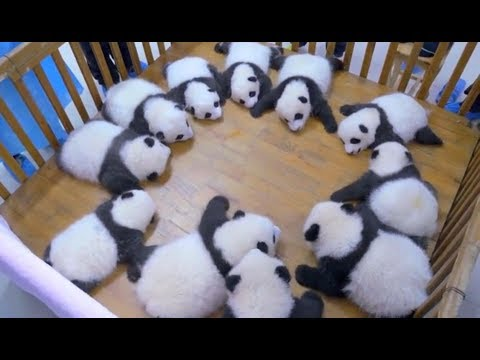

In [ ]:
from IPython.display import YouTubeVideo
id='Z98ZxYFsIWo'
YouTubeVideo(id=id,width=600,height=300)

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

In [ ]:
# IGNORE THIS CELL
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/exercises.css", "r").read()
    return HTML(styles)
css_styling()